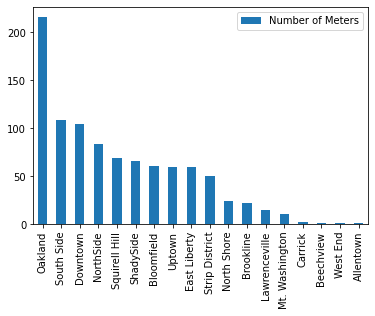

In [1]:
import pandas as pd
import numpy as np

meters = pd.read_csv('Parking_Meters_Pittsburgh_Parking_Authority.csv')

i = 0
temp_num = 0
num_of_meters = []
neighborhoods = []
while(i < len(meters)):
    if(meters.loc[i,'node'] in neighborhoods):
        temp_num = num_of_meters[neighborhoods.index(meters.loc[i,'node'])]
        temp_num += 1
        num_of_meters[neighborhoods.index(meters.loc[i,'node'])] = temp_num
        i += 1
    else:
        temp_num = 1
        neighborhoods.append(meters.loc[i,'node'])
        num_of_meters.append(temp_num)
        i += 1
        
del neighborhoods[len(neighborhoods) -1]
del num_of_meters[len(num_of_meters) -1]
neighborhoods[neighborhoods.index("Mt. Washingt*")] = "Mt. Washington"
neighborhoods[neighborhoods.index("Strip Distri*")] = "Strip District"

sums = pd.DataFrame(num_of_meters, index=neighborhoods, columns = ["Number of Meters"])
sums.sort_values(by=["Number of Meters"], inplace=True, ascending=False)

sums.head(20).plot.bar()

# Rationale
I chose to use the number of parking meters as a metric of neighborhood quality because it implies the following

- That there is enough economic activity in the area to attract patrons from far enough outside the area to warrent driving, or affluent enough patrons who would rather drive and pay the parking fare than to take a bus
- That there is a low enough rate of violent crime that the city is comfortable allocating the neighborhood's law enforcement resources towards parking violations via the Parking Authority as opposed to the much more heavily armed Police Department


# Code Explanation
The above code does the following:

1. Creates a dataframe from the CSV file
2. Condenses the data so that the columns are neighborhoods and not individual meters, and that all the meters for said neighborhood are the rows
3. Fixes some formatting carried over from the original data
4. Creates a bar graph of the top twenty neighborhoods in terms of the number of parking meters

# Analysis and Conclusion
From the information presented via the final bar graph, we see that while it does not lead the city in parking meters, Squirell Hill does remain in the top five, and represents a still very high number compared to other neighborhoods in the city. This number is even closer when the fact that Oakland is a signifigant outlier is considered, making it so that the difference between Squirell Hill and similar neighborhoods is relatively small. This is an important thing to note, as while I came into this without the intention of favoring any neighborhood over another, noting this outlier in relation to the next best neighborhoods by this metric, including Squirrel Hill, makes it clearer that the conclusion given by the other two metrics used is able to justify the usage of this one, despite not being an absolute win for Squirrel Hill, rather a relative win.